In [78]:
import os
import time
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [79]:
train_datagen = image.ImageDataGenerator(
  zoom_range=0.2,
  brightness_range=(0.5, 1.5),
  width_shift_range=0.2,
  vertical_flip=True,
  horizontal_flip=True,
  shear_range=0.2,
  validation_split= 0.4
)

base_dir = 'rockpaperscissors'

train_generator = train_datagen.flow_from_directory(
  base_dir,
  subset="training",
  target_size=(100, 150),)

validation_generator = train_datagen.flow_from_directory(
  base_dir,
  subset="validation",
  target_size=(100, 150),)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [80]:
now = time.time()

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100, 150, 3)),
  layers.Conv2D(16, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation='softmax')
])

model.compile(loss=CategoricalCrossentropy(),
  optimizer= Adam(),
  metrics=['accuracy']
)

history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator),
  epochs=20,
  verbose=2
)

dur = (time.time() - now) / 60
print(round(dur), "minutes")

Epoch 1/20
42/42 - 25s - loss: 1.0101 - accuracy: 0.4871 - val_loss: 0.7464 - val_accuracy: 0.7174
Epoch 2/20
42/42 - 25s - loss: 0.5263 - accuracy: 0.8059 - val_loss: 0.5206 - val_accuracy: 0.7712
Epoch 3/20
42/42 - 25s - loss: 0.4612 - accuracy: 0.8189 - val_loss: 0.3703 - val_accuracy: 0.8547
Epoch 4/20
42/42 - 25s - loss: 0.3126 - accuracy: 0.8874 - val_loss: 0.3921 - val_accuracy: 0.8570
Epoch 5/20
42/42 - 25s - loss: 0.3052 - accuracy: 0.8919 - val_loss: 0.2402 - val_accuracy: 0.9222
Epoch 6/20
42/42 - 25s - loss: 0.2374 - accuracy: 0.9193 - val_loss: 0.2190 - val_accuracy: 0.9336
Epoch 7/20
42/42 - 25s - loss: 0.1852 - accuracy: 0.9399 - val_loss: 0.2302 - val_accuracy: 0.9211
Epoch 8/20
42/42 - 25s - loss: 0.1808 - accuracy: 0.9444 - val_loss: 0.1146 - val_accuracy: 0.9645
Epoch 9/20
42/42 - 25s - loss: 0.1872 - accuracy: 0.9300 - val_loss: 0.1213 - val_accuracy: 0.9634
Epoch 10/20
42/42 - 26s - loss: 0.0965 - accuracy: 0.9658 - val_loss: 0.1062 - val_accuracy: 0.9634
Epoch 11/

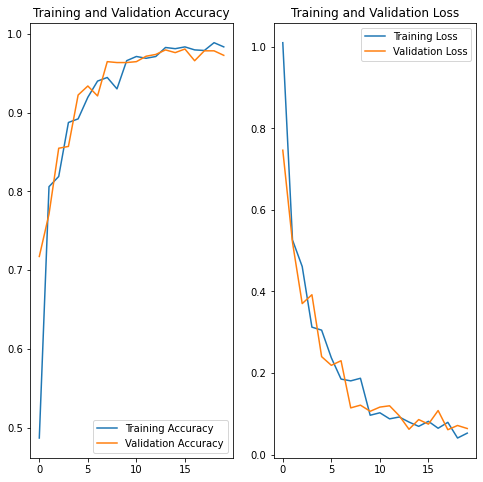

In [81]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [60]:
class_names = ["paper", "rock", "scissors"]

In [82]:
img1 = image.load_img("rockpaperscissors/rock/N235Vnlue0M9SwaK.png", target_size=(100, 150))

x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

img_array = np.vstack([x1])

predictions = model.predict(img_array)
print(class_names[np.argmax(predictions[0])])
print(100 * np.max(predictions[0]), "%")

rock
99.88058805465698 %


In [83]:
img = image.load_img("rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png", target_size=(100, 150))

x1 = image.img_to_array(img)
x1 = np.expand_dims(x1, axis=0)

img_array = np.vstack([x1])

predictions = model.predict(img_array)
print(class_names[np.argmax(predictions[0])])
print(100 * np.max(predictions[0]), "%")

paper
100.0 %


In [84]:
img = image.load_img("rockpaperscissors/scissors/NR48QMe5e1gskpA9.png", target_size=(100, 150))

x1 = image.img_to_array(img)
x1 = np.expand_dims(x1, axis=0)

img_array = np.vstack([x1])

predictions = model.predict(img_array)
print(class_names[np.argmax(predictions[0])])
print(100 * np.max(predictions[0]), "%")

scissors
99.91673231124878 %
